In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import itertools
from collections import defaultdict
import io
import gurobipy as gp
from gurobipy import GRB
from itertools import combinations
from random import sample
import math
import json
import random
import os
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern Roman'],
})
%matplotlib ipympl

In [20]:
# resets latex shit if things dont work
# mpl.rcParams.update(mpl.rcParamsDefault)

In [13]:
#redoing partials with additive
filename = 'compare_partials_data_additive/c_1_n_10_m_4_[[0, 0], [2, 2], [4, 2], [6, 2], [8, 2], [2, 3], [5, 4]].json'
data = pd.read_json(filename)
# print(data) 

plt.figure()

x = data[1]
for i in data[0].keys():
    y = data[0][i]
    plt.plot(x, y, label = f'{i}')

    
plt.xlabel('Number of queries, $N_q$')
plt.ylabel('N_sols')
# plt.xscale('log')
plt.yscale('log')
# plt.title("Averages of methods, 40 trials, n=10, m=4, c=1")
# plt.title(f'{heading_dict[feature]} for varying $c, m=5, n=30, N_{{trials}} =30$')
# plt.title(f"$c$")
# plt.ylim([0,105])
plt.legend()
# plt.savefig(f'querying_algorithm_plots/avg_comp_log_all.pdf') 
plt.show()

    

AttributeError: 'list' object has no attribute 'keys'

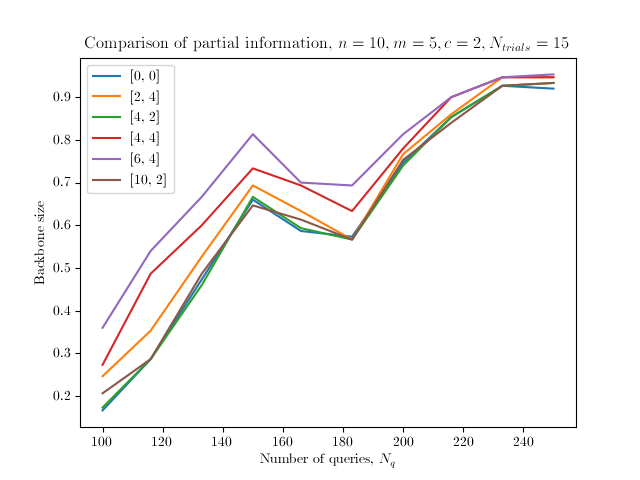

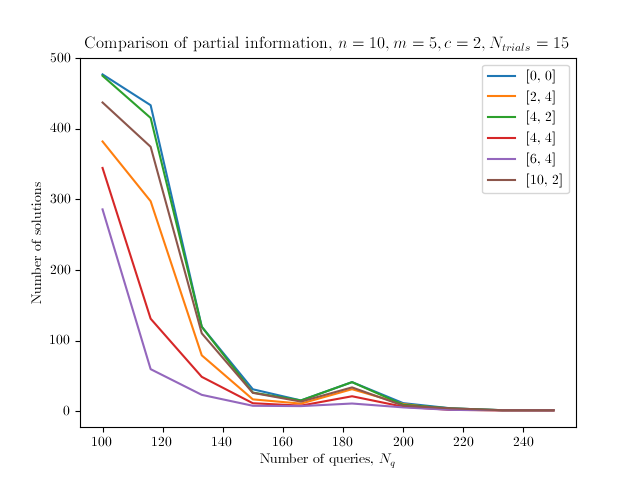

In [2]:
filename = 'compare_partials_data/c_2_n_10_m_5_[[0, 0], [2, 4], [4, 2], [4, 4], [6, 4], [10, 2]].json'
data = pd.read_json(filename)

for feature in ['backbone_size','N_sols_actual']:    
    heading_dict = {'backbone_size': 'Backbone size', 'tot_avg': 'Total similarity',
                    'row_avg': "Row Similarity", 'N_sols_actual': "Number of solutions"}
    
    # plt.clf() 
    plt.figure()
    x = data.keys()
    keys = data[x[0]].keys()
    
    for key in keys:
        y = [data[i][key][feature] for i in x]
        plt.plot(x, y, label = f'{key}')
    
    plt.xlabel('Number of queries, $N_q$')
    plt.ylabel(f'{heading_dict[feature]}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.title("Comparison of partial information, $n=10,m=5,c=2,N_{trials}=15$")
    # plt.title(f'{heading_dict[feature]} for varying $c, m=5, n=30, N_{{trials}} =30$')
    # plt.title(f"$c$")
    # plt.ylim([0,105])
    plt.legend()
    # plt.savefig(f'compare_partials_data/figures/{feature}_comp.pdf') 
    plt.show()
    # plt.close()
    

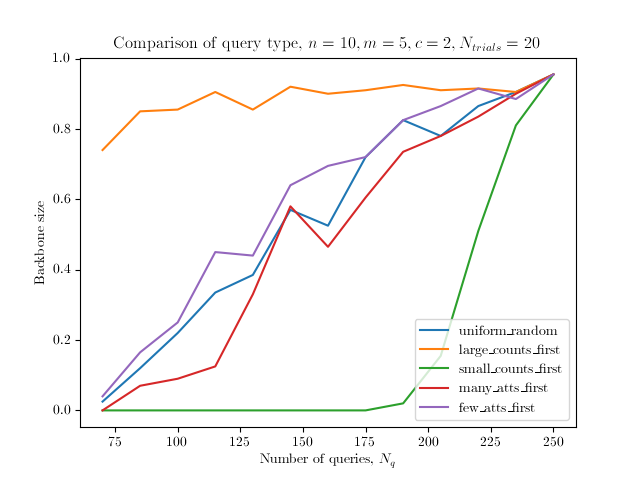

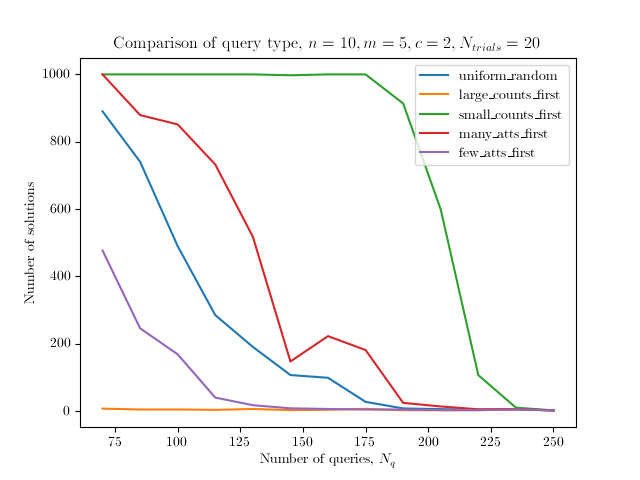

In [19]:
filename = "compare_quer_type/c_2_n_10_m_5_['uniform_random', 'large_counts_first', 'small_counts_first', 'many_atts_first', 'few_atts_first'].json"

data = pd.read_json(filename)



for feature in ['backbone_size','N_sols_actual']:    
    heading_dict = {'backbone_size': 'Backbone size', 'tot_avg': 'Total similarity',
                    'row_avg': "Row Similarity", 'N_sols_actual': "Number of solutions"}
    
    # plt.clf() 
    plt.figure()
    x = data.keys()
    keys = data[x[0]].keys()
    
    for key in keys:
        y = [data[i][key][feature] for i in x]
        plt.plot(x, y, label = f'{key}')
    
    plt.xlabel('Number of queries, $N_q$')
    plt.ylabel(f'{heading_dict[feature]}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.title("Comparison of query type, $n=10,m=5,c=2,N_{trials}=20$")
    # plt.title(f'{heading_dict[feature]} for varying $c, m=5, n=30, N_{{trials}} =30$')
    # plt.title(f"$c$")
    # plt.ylim([0,105])
    plt.legend()
    
    filename = f'compare_quer_type/figures/{feature}_comp_again.pdf'
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    plt.savefig(filename) 
    plt.show()
    # plt.close()
    

{'n': 10, 'm': 5, 'c': 2, 'N_q_range': [10, 12, 15, 18, 21, 24, 27, 30, 32, 35, 38, 41, 44, 47, 50], 'N_sols': 2000, 'N_trials': 20}


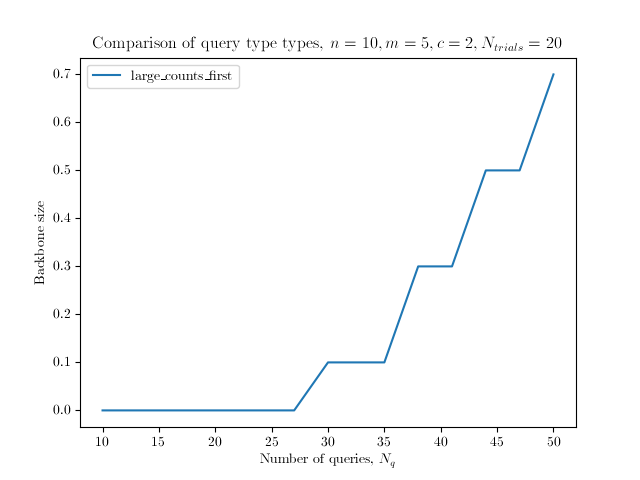

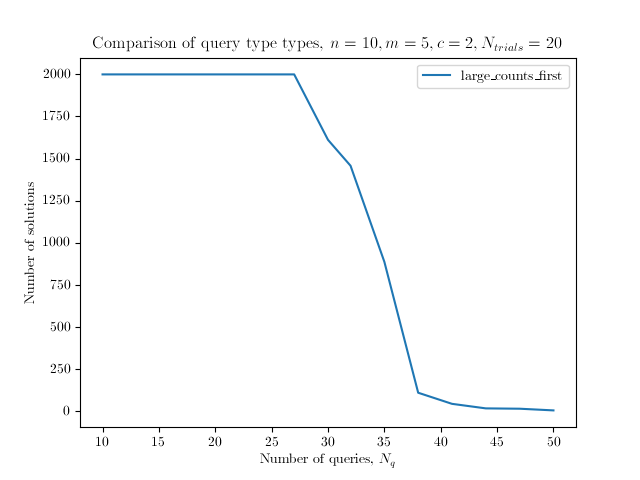

In [34]:
filename = 'compare_quer_type_additive/c_2_n_10_m_5_large_counts_first.json'
data = pd.read_json(filename)
filename_params = filename[0:len(filename)-5] + '_params' + filename[len(filename)-5:]
f = open(filename_params)
data_params = json.load(f)
print(data_params)

for feature in ['backbone_size','N_sols_actual']:    
    heading_dict = {'backbone_size': 'Backbone size', 'tot_avg': 'Total similarity',
                    'row_avg': "Row Similarity", 'N_sols_actual': "Number of solutions"}
    
    # plt.clf() 
    plt.figure()
    x = data.keys()
    keys = data[x[0]].keys()
    
    for key in keys:
        y = [data[i][key][feature] for i in x]
        plt.plot(x, y, label = f'{key}')
    
    plt.xlabel('Number of queries, $N_q$')
    plt.ylabel(f'{heading_dict[feature]}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.title(f"Comparison of query type types, $n={data_params['n']}, \
              m={data_params['m']},c={data_params['c']},N_{{trials}}={data_params['N_trials']}$")
    # plt.title(f'{heading_dict[feature]} for varying $c, m=5, n=30, N_{{trials}} =30$')
    # plt.title(f"$c$")
    # plt.ylim([0,105])
    plt.legend()
    # plt.savefig(f'figures/{feature}_comp.pdf') 
    
    filename = f'compare_quer_type_additive/figures/{feature}_large_counts_first.pdf'
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    plt.savefig(filename) 
    
    plt.show()
    # plt.close()

In [30]:
a = 'ergerge'
b = a[0:len(a)-2] + 'wwww' + a[len(a)-2:]
b

'ergerwwwwge'